In [ ]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@文件        :07.clusterDEGs.ipynb
@说明        :
@时间        :2023/02/21 20:39:42
@作者        :Wu Baosheng
@版本        :1.0
This script is used to cluster DEGs for different species
'''

In [1]:
import scanpy as sc
import scanpy.external as sce
import pandas as pd
import numpy as np
import re,sys,os
os.chdir('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/03.endothelial')

In [2]:
adata = sc.read_h5ad("H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/sevenSpecies.integrate.h5ad")

In [3]:
def transSpeciesSadata(adata,species,cluster='leiden'):
    adata2=adata[adata.obs['species']==species]
    sp = species[:2]
    adata2=adata2[:,adata2.var_names.str.startswith(sp)]
    sc.tl.rank_genes_groups(adata2, cluster, method='wilcoxon')
    return adata2

In [4]:
human_endo=transSpeciesSadata(adata,species='human',cluster='leiden')
frog_endo=transSpeciesSadata(adata,species='frog',cluster='leiden')
lungfish_endo=transSpeciesSadata(adata,species='lungfish',cluster='leiden')
bichir_endo=transSpeciesSadata(adata,species='bichir',cluster='leiden')
dogshark_endo=transSpeciesSadata(adata,species='dogshark',cluster='leiden')
lamprey_endo=transSpeciesSadata(adata,species='lamprey',cluster='leiden')
# lacelet_endo=transSpeciesSadata(adata,species='lacelet',cluster='leiden')

c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
c:\Users\wubaosheng\AppD

In [5]:
endo_list = [human_endo,frog_endo,lungfish_endo,bichir_endo,dogshark_endo,lamprey_endo]
def endoInfo2DIR(adata_list=endo_list,group="7"):
    endo_DEG_dir = {}
    for m in adata_list:
        df = pd.DataFrame()
        sp = m.obs['species'].unique()[0]
        print(sp)
        df = sc.get.rank_genes_groups_df(m,group=[group])
        df1=df[(df['pvals_adj']<0.01) & (df['logfoldchanges']>=1)]
        if df1.shape[0] == 0:
            print(df.head(100))
            endo_DEG_dir[sp] = df.head(100)
        else:
            endo_DEG_dir[sp]=df1
            print(df1)
    return endo_DEG_dir

In [ ]:
DEG = endoInfo2DIR(adata_list=endo_list,group="7")

In [7]:
def gene2Name():
    dic2 = {}
    path='H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/04.gene2names'
    for i in os.listdir(path):
        if i.endswith('.tsv'):
            dic1 = {}
            sp = i.split('.')[0]
            file =open(path+'/'+i,'r')
            for line in file:
                line = line.strip().split('\t')
                if sp != 'lamprey':
                    dic1[sp[0:2] + '_' + line[0]] = line[1]
                    dic2[sp] = dic1
                if sp == 'lamprey':
                    dic1['lm' + '_' + line[0]] = line[1]
                    dic2[sp] = dic1
            file.close()
        else:
            continue
    return dic2

In [8]:
gene_name = {}
gene_name = gene2Name()

In [9]:
for i in DEG.keys():
    DEG[i]['gene_names'] = DEG[i]['names'].map(gene_name[i])

In [ ]:
DEG

In [10]:
df_genes =pd.DataFrame()
g = []
for j in DEG.keys():
    g = g+list(DEG[j]['gene_names'])
    

In [11]:
import numpy as np
import math
m= set(g)
endo_deg=[]
for x in m:
    if g.count(x) >= 5:
        if str(x)=='nan':
            continue
        else:
            a='hu_' + str(x)
            endo_deg.append(a)
            print(f'{x}:{g.count(x)}')

SEMA6A:5
CALCRL:5
NRP2:5
TUBA1A:5
TGFBR3:5
APLNR:5
OIT3:6
TMEM204:5
PLPP3:6
VWF:5
SGK1:5
CRIM1:5
FLT4:5
ADGRL4:5
MYO1C:5
RARB:5
PLXND1:5
SHE:5
PLK2:5
FGD5:5
FLI1:7
FLT1:6
ASAP1:5
TEK:6
RGS3:5
TANC2:5
SPTBN1:5


In [ ]:
gene_name['frog']['fr_FROG000280']

'FLT1'

In [ ]:
genes = []
for x in gene_name.keys():
    for y in gene_name[x].keys():
        if gene_name[x][y] == 'NRP2':
            genes.append(y)
print(genes)

['bi_BIRCIR003984', 'do_PRE04601', 'fr_FROG009833', 'hu_NRP2', 'lm_QSM017441', 'lm_QSM084873', 'lm_QSM121323', 'lm_QSM146998', 'lm_QSM159176']


In [ ]:
endo_deg

['hu_FGD5',
 'hu_OIT3',
 'hu_TUBA1A',
 'hu_APLNR',
 'hu_RARB',
 'hu_SHE',
 'hu_ASAP1',
 'hu_TANC2',
 'hu_PLK2',
 'hu_TGFBR3',
 'hu_PLPP3',
 'hu_SGK1',
 'hu_CALCRL',
 'hu_VWF',
 'hu_MYO1C',
 'hu_NRP2',
 'hu_RGS3',
 'hu_PLXND1',
 'hu_TEK',
 'hu_FLT4',
 'hu_SEMA6A',
 'hu_FLI1',
 'hu_FLT1',
 'hu_SPTBN1',
 'hu_TMEM204',
 'hu_ADGRL4',
 'hu_CRIM1']

In [ ]:
endo_deg2=['hu_FGD5', 'hu_OIT3', 'hu_FLT1', 'hu_LYVE1','hu_KDR','hu_TEK', 'hu_FLT4','hu_VWF','hu_PLXND1','hu_APLNR', 'hu_SHE', 'hu_ASAP1', 'hu_TGFBR3', 'hu_PLPP3', 'hu_SGK1', 'hu_CALCRL',  'hu_NRP2', 'hu_SEMA6A',  'hu_TMEM204', 'hu_ADGRL4']

In [ ]:
import seaborn as sns
cmap = sns.blend_palette(['#495579','#FFFAFA','#DD5353'],as_cmap=True)   ##4C6793
sc.pl.dotplot(adata,endo_deg2,groupby='cell_type',standard_scale='var',linewidth=0.01,figsize=[6,3],cmap=cmap,save='_endo_marker2.pdf')  ##save='_endo_marker2.pdf'

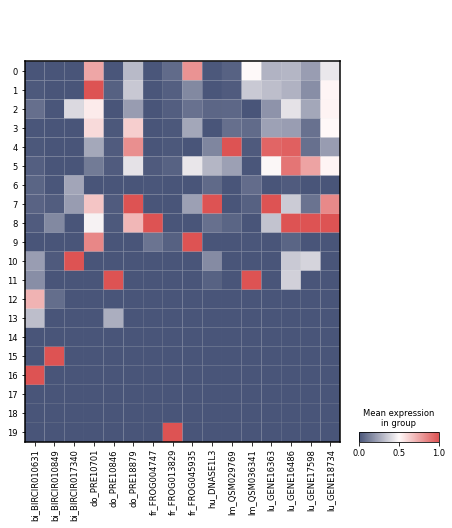

In [ ]:
import seaborn as sns
cmap = sns.blend_palette(['#495579','#FFFAFA','#DD5353'],as_cmap=True)   ##4C6793
sc.pl.matrixplot(adata,genes,groupby='leiden',standard_scale='var',cmap=cmap,linewidth=0.01) ###,save='_endo_marker.pdf'

In [ ]:
def transSpeciesSadata(adata,species,cluster='leiden',min_values=10):
    adata2=adata[adata.obs['species']==species]
    sp = species[:2]
    adata2=adata2[:,adata2.var_names.str.startswith(sp)]
    df1=adata2.obs[cluster].value_counts()
    target_group = df1[df1.values>min_values].index.to_list()
    adata2 = adata2[adata2.obs[cluster].isin(target_group)]
    sc.tl.rank_genes_groups(adata2, cluster, method='wilcoxon')
    return adata2

In [ ]:
lamprey = transSpeciesSadata(adata,species='lamprey',cluster='leiden',min_values=10)

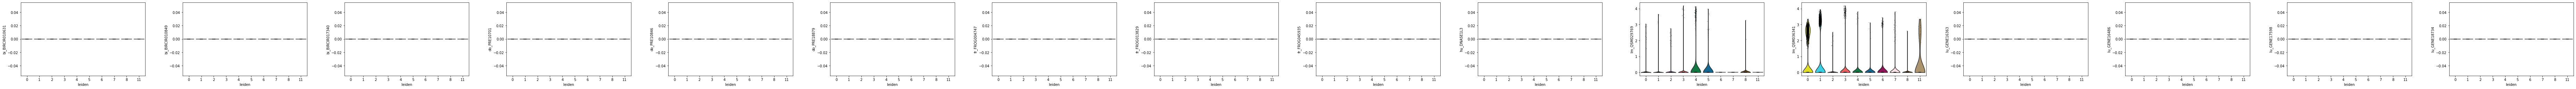

In [ ]:
sc.pl.violin(lamprey,genes,groupby='leiden',standard_scale='var')

In [ ]:
dogshark = transSpeciesSadata(adata,species='dogshark',cluster='leiden',min_values=10)

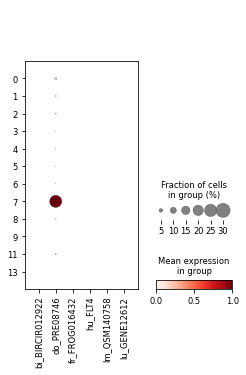

In [ ]:
sc.pl.dotplot(dogshark,FLI1,groupby='leiden',standard_scale='var')

In [ ]:
bichir = transSpeciesSadata(adata,species='bichir',cluster='leiden',min_values=10)

c:\Users\wubaosheng\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


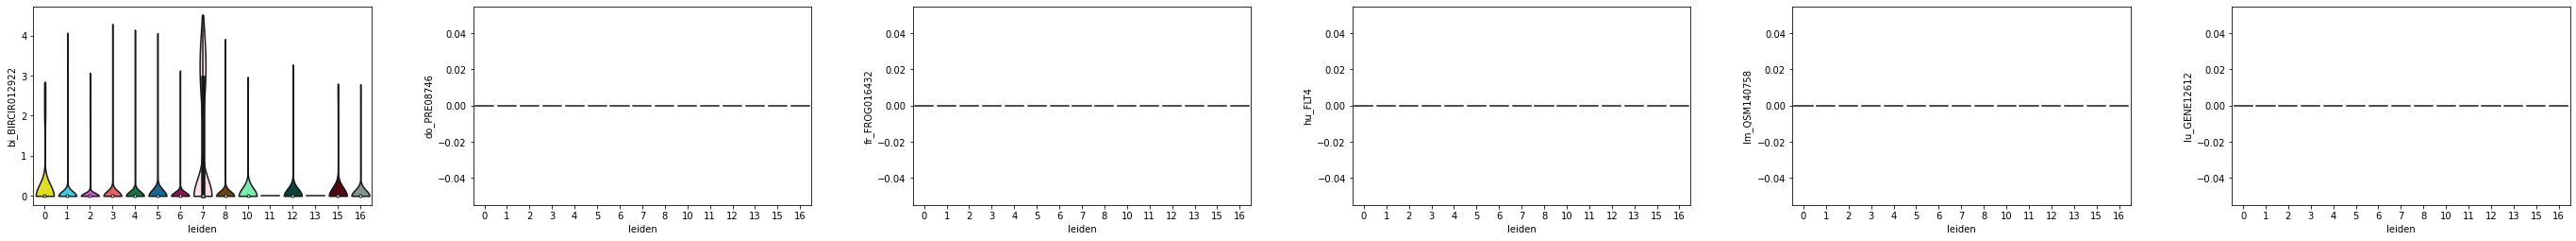

In [ ]:
sc.pl.violin(bichir,FLI1,groupby='leiden',standard_scale='var',stripplot=False, inner='box')

In [ ]:
lungfish = transSpeciesSadata(adata,species='lungfish',cluster='leiden',min_values=10)

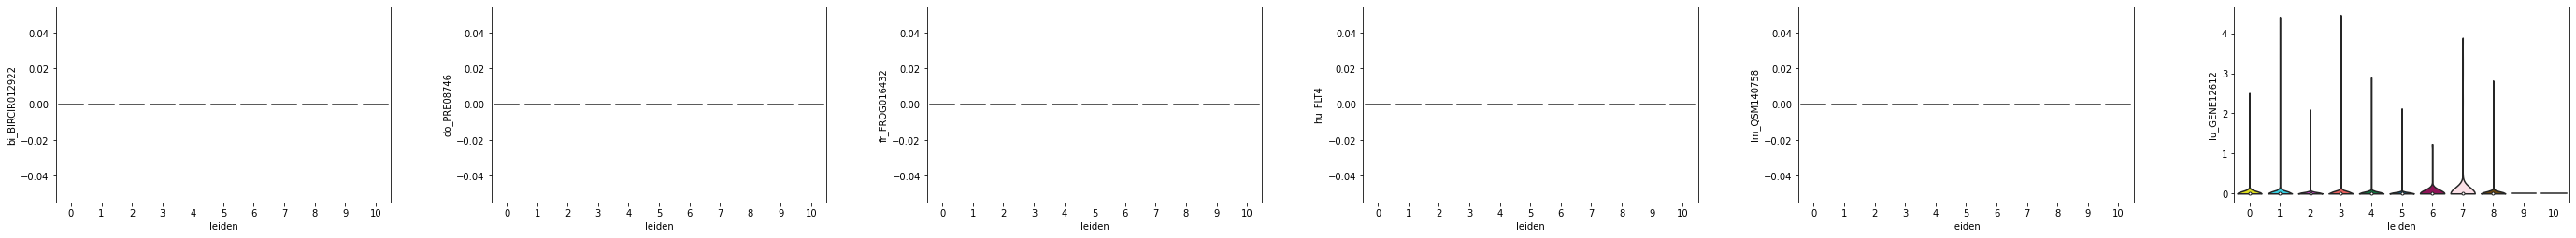

In [ ]:
sc.pl.violin(lungfish,FLI1,groupby='leiden',stripplot=False, inner='box')

In [ ]:
frog = transSpeciesSadata(adata,species='frog',cluster='leiden',min_values=10)

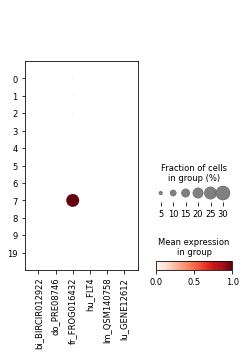

In [ ]:
sc.pl.dotplot(frog,FLI1,groupby='leiden',standard_scale='var')

In [ ]:
sc.pl.dotplot(frog,['fr_FROG000280'],groupby='leiden',standard_scale='var')

In [ ]:
human = transSpeciesSadata(adata,species='human',cluster='leiden',min_values=10)


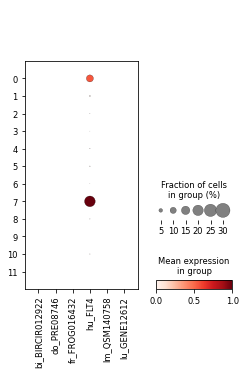

In [ ]:
sc.pl.dotplot(human,FLI1,groupby='leiden',standard_scale='var')

In [ ]:
adata